# Python e API

#### Pegar a Cotação Atual de Todas as Moedas 

In [129]:
import requests
import json
cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.477', 'low': '5.4744', 'varBid': '0.0022', 'pctChange': '0.04', 'bid': '5.4765', 'ask': '5.4775', 'timestamp': '1633467602', 'create_date': '2021-10-05 18:00:02'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.47', 'low': '5.45', 'varBid': '-0.015', 'pctChange': '-0.27', 'bid': '5.29', 'ask': '5.62', 'timestamp': '1622030940', 'create_date': '2021-05-26 09:09:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.3555', 'low': '4.3303', 'varBid': '-0.0169', 'pctChange': '-0.39', 'bid': '4.3323', 'ask': '4.3345', 'timestamp': '1633520067', 'create_date': '2021-10-06 08:34:27'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.4687', 'low': '7.418', 'varBid': '-0.0332', 'pctChange': '-0.44', 'bid': '7.4267', 'ask': '7.4302', 'timestamp': '1633520067

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin?

In [128]:
print('Dólar: {}'.format(cotacoes_dic['USD'].get('bid')))
print('Euro: {}'.format(cotacoes_dic['EUR'].get('bid')))
print('BitCoin: {}'.format(cotacoes_dic['BTC'].get('bid')))

Dólar: 5.4765
Euro: 6.3182
BitCoin: 280.93


#### Pegar a cotação dos últimos 30 dias do dólar

In [127]:
dolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
dolar_30d_dic = dolar_30d.json()

lista_cotacoes_dolar = [float(cotacao['bid']) for cotacao in dolar_30d_dic]
print(lista_cotacoes_dolar)

[5.2332, 5.0358, 5.5458, 5.6753, 5.5679, 5.6133, 5.5892, 5.6639, 5.7075, 5.7071, 5.6315, 5.7729, 5.7819, 5.7561, 5.6491, 5.6211, 5.5214, 5.5602, 5.5832, 5.6244, 5.6156, 5.5518, 5.5357, 5.672, 5.8025, 5.8755, 5.6908, 5.6693, 5.6193, 5.6761]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [126]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/200?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid'])for item in cotacoes_btc_dic]
print(lista_cotacoes_btc)

[5.7416, 5.779, 5.7461, 5.7055, 5.624, 5.617, 5.5926, 5.609, 5.6053, 5.6064, 5.6453, 5.6124, 5.5912, 5.5691, 5.5316, 5.5315, 5.5997, 5.6122, 5.593, 5.5745, 5.6821, 5.6434, 5.6105, 5.6319, 5.6605, 5.5613, 5.5089, 5.5931, 5.4714, 5.4144, 5.3895, 5.3906, 5.2394, 5.2376, 5.2758, 5.2695, 5.3174, 5.3168, 5.317, 5.3092, 5.3615, 5.2995, 5.2995, 5.3003, 5.2908, 5.3405, 5.3985, 5.492, 5.394, 5.5681, 5.6097, 5.5087, 5.6107, 5.6195, 5.6185, 5.5622, 5.5575, 5.466, 5.509, 5.4237, 5.4212, 5.368, 5.4272, 5.3825, 5.4852, 5.4378, 5.4374, 5.3291, 5.2902, 5.289, 5.3205, 5.2215, 5.222, 5.155, 5.17, 5.1627, 5.149, 5.2304, 5.2288, 5.2122, 5.1191, 5.1725, 5.3329, 5.3842, 5.3891, 5.331, 5.3694, 5.3653, 5.4036, 5.3238, 5.3237, 5.3268, 5.3386, 5.339, 5.3811, 5.3529, 5.3158, 5.3108, 5.3616, 5.3172, 5.4633, 5.4032, 5.484, 5.4805, 5.3645, 5.3439, 5.1536, 5.2581, 5.3105, 5.3125, 5.371, 5.2287, 5.244, 5.1547, 5.0511, 5.0473, 4.976, 4.9712, 4.8998, 4.8186, 4.9585, 4.9614, 5.1174, 5.0632, 5.3665, 5.363, 5.338, 5.3365, 

#### Cotações bitcoin dos ultimos 180 dias, exibindo em um grafico

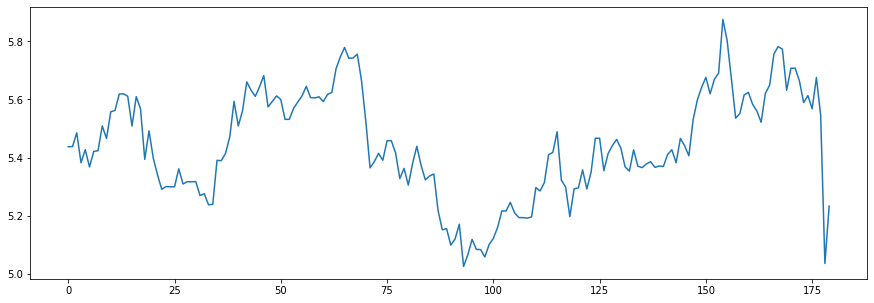

In [125]:
import matplotlib.pyplot as plt
btc_180d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/180')
btc_180d_dic = btc_180d.json()
lista_cotacoes = [float(cotacao['bid']) for cotacao in btc_180d_dic]
lista_cotacoes.reverse()

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes)
plt.show()